# Lecture: Pandas in depth

In [5]:
import numpy as np
import pandas as pd

# Show me everything! 
# pd.options.display.max_rows = 999   
# pd.options.display.max_columns = 999 

- copies and views 
    - copy()
- data manipulations
    - assign(), map(), apply(), applymap(), trasnform()
- missing values
    - isnull(), notnull(), dropna(), fillna(), replace()
- sorting and filtering
    - sort()
- gruping and agregating 
     - groupby()
- basic plotting
- hierarchical indexing 
- join tables

## Views and copies 
https://www.practicaldatascience.org/html/views_and_copies_in_pandas.html

In [6]:
df = pd.DataFrame({"a": np.arange(4), "b": np.arange(4)}, dtype='float')
df

,a,b
0,0.0,0.0
1,1.0,1.0
2,2.0,2.0
3,3.0,3.0


In [7]:
my_slice = df.iloc[1:3]
my_slice

,a,b
1,1.0,1.0
2,2.0,2.0


In [8]:
df.iloc[1, 0] = 3.14
my_slice

,a,b
1,3.14,1.0
2,2.00,2.0


In [9]:
my_slice.iloc[1,0] = 999 
df

/tmp/ipykernel_109061/881996486.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_slice.iloc[1,0] = 999


,a,b
0,0.00,0.0
1,3.14,1.0
2,999.00,2.0
3,3.00,3.0


In [10]:
df1 = pd.DataFrame({ 'a':[0,0,0], 'b': [1,1,1]})
print(df1, '\n')
df2 = df1
df2['a'] = df2['a'] + 1
print(df1)

   a  b
0  0  1
1  0  1
2  0  1 

   a  b
0  1  1
1  1  1
2  1  1


In [11]:
# always copy explicitly when you need it
my_slice = df["a"].copy()

## Data manipulations 

In [12]:
A = pd.Series([2, 4, 6], index=[0, 1, 2])
B = pd.Series([1, 3, 5], index=[1, 2, 3])
print(A)
print(B)

0    2
1    4
2    6
dtype: int64
1    1
2    3
3    5
dtype: int64


In [13]:
# similar to the numpy arrays and broadcasting 
print(A+B)

0    NaN
1    5.0
2    9.0
3    NaN
dtype: float64


In [14]:
C = np.random.randint(10, size=(3, 4))
print(C - C[0])

[[ 0  0  0  0]
 [ 2  5  2 -3]
 [ 6  4  1 -3]]


In [15]:
df = pd.DataFrame(C, columns=list('QRST'))
print(df)
print(df.iloc[0])
print(df - df.iloc[0])

   Q  R  S  T
0  0  2  3  5
1  2  7  5  2
2  6  6  4  2
Q    0
R    2
S    3
T    5
Name: 0, dtype: int64
   Q  R  S  T
0  0  0  0  0
1  2  5  2 -3
2  6  4  1 -3


In [16]:
# Supstract a column? -- it's legale but generally have no sense  
df.subtract(df['S'],  axis='columns')

,Q,R,S,T,0,1,2
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
print(df)
df.sub([1, 2, 3, 4], axis='columns')

   Q  R  S  T
0  0  2  3  5
1  2  7  5  2
2  6  6  4  2


,Q,R,S,T
0,-1,0,0,1
1,1,5,2,-2
2,5,4,1,-2


In [18]:
df1 = pd.DataFrame({'A':A, 'B':B})
print(df * 5 + 2)

    Q   R   S   T
0   2  12  17  27
1  12  37  27  12
2  32  32  22  12


### More transformations 

In [38]:
import seaborn as sns
planets = sns.load_dataset('planets')
planets.head(3)

# df['column_name'] is the same to df.column_name !!!
# planets['mass'] is planets.mass
# planets.mass

# What way is better to use? 

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011


In [48]:
# Data from https://cneos.jpl.nasa.gov/fireballs/
df = pd.read_csv('cneos_fireball_data.csv')
df.head(5)

,Peak Brightness Date/Time (UT),Latitude (deg.),Longitude (deg.),Altitude (km),Velocity (km/s),vx,vy,vz,Total Radiated Energy (J),Calculated Total Impact Energy (kt)
0,2020-11-07 21:27:04,59.8N,16.8E,22.3,16.7,-10.8,1.2,-12.7,1.110000e+11,0.330
1,2020-10-26 15:09:10,5.9S,160.4E,28.5,17.6,10.9,-13.8,-0.1,1.140000e+11,0.340
2,2020-10-23 20:51:39,30.0N,71.9W,48.0,NaN,NaN,NaN,NaN,8.000000e+10,0.250
3,2020-10-22 17:39:33,22.0N,133.5W,40.0,17.6,-9.4,14.1,-4.9,4.400000e+10,0.150
4,2020-10-21 18:57:33,12.9N,150.2W,NaN,NaN,NaN,NaN,NaN,2.200000e+10,0.079


In [49]:
# assign

# create new column from the transforming other columns
# def my_func: ...

def orb_rad(x):
    # x is a DataFrame 
    G = 1
    return (G*x['mass']*x['orbital_period']**2 / (4*np.pi**2))**(1/3)

planets.assign(orb_rad = orb_rad(planets))

,method,number,orbital_period,mass,distance,year,orb_rad
0,Radial Velocity,1,269.300000,7.10,77.40,2006,23.539132
1,Radial Velocity,1,874.774000,2.21,56.95,2008,34.989797
2,Radial Velocity,1,763.000000,2.60,19.84,2011,33.720000
3,Radial Velocity,1,326.030000,19.40,110.62,2007,37.381126
4,Radial Velocity,1,516.220000,10.50,119.47,2009,41.384058
...,...,...,...,...,...,...,...
1030,Transit,1,3.941507,NaN,172.00,2006,NaN
1031,Transit,1,2.615864,NaN,148.00,2007,NaN
1032,Transit,1,3.191524,NaN,174.00,2007,NaN
1033,Transit,1,4.125083,NaN,293.00,2008,NaN


In [50]:
# using lambda
df.assign(abs_velocity = lambda x: np.sqrt(x['vx']**2+x['vy']**2+x['vz']**2))

,Peak Brightness Date/Time (UT),Latitude (deg.),Longitude (deg.),Altitude (km),Velocity (km/s),vx,vy,vz,Total Radiated Energy (J),Calculated Total Impact Energy (kt),abs_velocity
0,2020-11-07 21:27:04,59.8N,16.8E,22.3,16.7,-10.8,1.2,-12.7,1.110000e+11,0.330,16.714365
1,2020-10-26 15:09:10,5.9S,160.4E,28.5,17.6,10.9,-13.8,-0.1,1.140000e+11,0.340,17.585790
2,2020-10-23 20:51:39,30.0N,71.9W,48.0,NaN,NaN,NaN,NaN,8.000000e+10,0.250,NaN
3,2020-10-22 17:39:33,22.0N,133.5W,40.0,17.6,-9.4,14.1,-4.9,4.400000e+10,0.150,17.640295
4,2020-10-21 18:57:33,12.9N,150.2W,NaN,NaN,NaN,NaN,NaN,2.200000e+10,0.079,NaN
...,...,...,...,...,...,...,...,...,...,...,...
842,1993-11-29 17:48:41,26.5N,78.3E,NaN,NaN,NaN,NaN,NaN,2.600000e+10,0.092,NaN
843,1993-10-31 03:39:27,51.3N,100.9W,NaN,NaN,NaN,NaN,NaN,4.000000e+10,0.130,NaN
844,1991-10-04 09:22:47,78.7N,6.3E,NaN,NaN,NaN,NaN,NaN,5.500000e+11,1.400,NaN
845,1990-10-01 03:51:47,7.5N,142.8E,NaN,NaN,NaN,NaN,NaN,2.500000e+12,5.200,NaN


#### Map vs. apply vs. applymap 

===> 
https://syntaxfix.com/question/12451/difference-between-map-applymap-and-apply-methods-in-pandas

Apply - to one column or to one row on each elemnt

Map - to one column 

In [51]:
# map 
# The map method works on a Series and maps each value based on what is passed as arg to the function. 
# map is fast
df['Total Radiated Energy (J)'] = df['Total Radiated Energy (J)'].map(lambda x: x*10**(-9))
df = df.rename(columns={'Total Radiated Energy (J)': 'Total Radiated Energy (nJ)'})
df

,Peak Brightness Date/Time (UT),Latitude (deg.),Longitude (deg.),Altitude (km),Velocity (km/s),vx,vy,vz,Total Radiated Energy (nJ),Calculated Total Impact Energy (kt)
0,2020-11-07 21:27:04,59.8N,16.8E,22.3,16.7,-10.8,1.2,-12.7,111.0,0.330
1,2020-10-26 15:09:10,5.9S,160.4E,28.5,17.6,10.9,-13.8,-0.1,114.0,0.340
2,2020-10-23 20:51:39,30.0N,71.9W,48.0,NaN,NaN,NaN,NaN,80.0,0.250
3,2020-10-22 17:39:33,22.0N,133.5W,40.0,17.6,-9.4,14.1,-4.9,44.0,0.150
4,2020-10-21 18:57:33,12.9N,150.2W,NaN,NaN,NaN,NaN,NaN,22.0,0.079
...,...,...,...,...,...,...,...,...,...,...
842,1993-11-29 17:48:41,26.5N,78.3E,NaN,NaN,NaN,NaN,NaN,26.0,0.092
843,1993-10-31 03:39:27,51.3N,100.9W,NaN,NaN,NaN,NaN,NaN,40.0,0.130
844,1991-10-04 09:22:47,78.7N,6.3E,NaN,NaN,NaN,NaN,NaN,550.0,1.400
845,1990-10-01 03:51:47,7.5N,142.8E,NaN,NaN,NaN,NaN,NaN,2500.0,5.200


In [52]:
# apply works on dataframes and could be used for applying any function that cannot be vectorised
# add two hours to the date and time colum

# this works both with apply and map 
from datetime import timedelta
df['Peak Brightness Date/Time (UT)'] = pd.to_datetime(df['Peak Brightness Date/Time (UT)'])
df['Peak Brightness Date/Time (UT)'] = df['Peak Brightness Date/Time (UT)'].map(lambda x: x + timedelta(hours=2))
df = df.rename(columns={'Peak Brightness Date/Time (UT)':'Peak Brightness Date/Time (UTC+2)'})

df

,Peak Brightness Date/Time (UTC+2),Latitude (deg.),Longitude (deg.),Altitude (km),Velocity (km/s),vx,vy,vz,Total Radiated Energy (nJ),Calculated Total Impact Energy (kt)
0,2020-11-07 23:27:04,59.8N,16.8E,22.3,16.7,-10.8,1.2,-12.7,111.0,0.330
1,2020-10-26 17:09:10,5.9S,160.4E,28.5,17.6,10.9,-13.8,-0.1,114.0,0.340
2,2020-10-23 22:51:39,30.0N,71.9W,48.0,NaN,NaN,NaN,NaN,80.0,0.250
3,2020-10-22 19:39:33,22.0N,133.5W,40.0,17.6,-9.4,14.1,-4.9,44.0,0.150
4,2020-10-21 20:57:33,12.9N,150.2W,NaN,NaN,NaN,NaN,NaN,22.0,0.079
...,...,...,...,...,...,...,...,...,...,...
842,1993-11-29 19:48:41,26.5N,78.3E,NaN,NaN,NaN,NaN,NaN,26.0,0.092
843,1993-10-31 05:39:27,51.3N,100.9W,NaN,NaN,NaN,NaN,NaN,40.0,0.130
844,1991-10-04 11:22:47,78.7N,6.3E,NaN,NaN,NaN,NaN,NaN,550.0,1.400
845,1990-10-01 05:51:47,7.5N,142.8E,NaN,NaN,NaN,NaN,NaN,2500.0,5.200


In [230]:
# applymap works elemntwise across multiple rows/columns -- but depricated
df_test = pd.DataFrame({'Name': ['Pankaj', 'Meghna'], 'Role': ['ceo', 'cto']})

df_test1 = df_test.applymap(str.upper)

print(df_test, '\n')
print(df_test1)

     Name Role
0  Pankaj  ceo
1  Meghna  cto 

     Name Role
0  PANKAJ  CEO
1  MEGHNA  CTO


/tmp/ipykernel_56329/826018764.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_test1 = df_test.applymap(str.upper)


#### transform vs. apply
apply(func, axis=0) and apply(func, axis=0)

- transform() works with function, a string function, a list of functions, and a dict. However, apply() is only allowed with function.
- transform() cannot produce aggregated results.
- apply() works with multiple Series at a time. But, transform() is only allowed to work with a single Series at a time.

In [280]:
# transform df
# df['Longitude (deg.)'].transform(lambda x: str(x)[-1])

df['Longitude (deg.)'].transform([lambda x: str(x)[-1]])

,<lambda>
0,E
1,E
2,W
3,W
4,W
...,...
842,E
843,W
844,E
845,E


# Handling missing values

https://medium.com/@roshankg96/handling-missing-data-in-pandas-a3c8dfbd1db

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011


### None vs. NaN. 
https://note.nkmk.me/en/python-pandas-nan-none-na/


NaN: Not a Number. NaN is a missing floating-point value. 

None is a Python Object called NoneType.

pd.NA - Pandas object

In [72]:
print(type(np.nan))
print(type(None))
print(type(pd.NA))

<class 'float'>
<class 'NoneType'>
<class 'pandas._libs.missing.NAType'>


In [73]:
np.nan == np.nan

False

In [74]:
pd.NA == pd.NA

<NA>

In [77]:
None == None

True

### Functions

isnull(), notnull(), dropna(), fillna(), replace()

In [79]:
planets

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300000,7.10,77.40,2006
1,Radial Velocity,1,874.774000,2.21,56.95,2008
2,Radial Velocity,1,763.000000,2.60,19.84,2011
3,Radial Velocity,1,326.030000,19.40,110.62,2007
4,Radial Velocity,1,516.220000,10.50,119.47,2009
...,...,...,...,...,...,...
1030,Transit,1,3.941507,NaN,172.00,2006
1031,Transit,1,2.615864,NaN,148.00,2007
1032,Transit,1,3.191524,NaN,174.00,2007
1033,Transit,1,4.125083,NaN,293.00,2008


In [78]:
print(planets.shape)
print(planets.info())

(1035, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   method          1035 non-null   object 
 1   number          1035 non-null   int64  
 2   orbital_period  992 non-null    float64
 3   mass            513 non-null    float64
 4   distance        808 non-null    float64
 5   year            1035 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB
None


## Vizualize with missingno 

In [ ]:
# !pip install missingno

In [84]:
import missingno

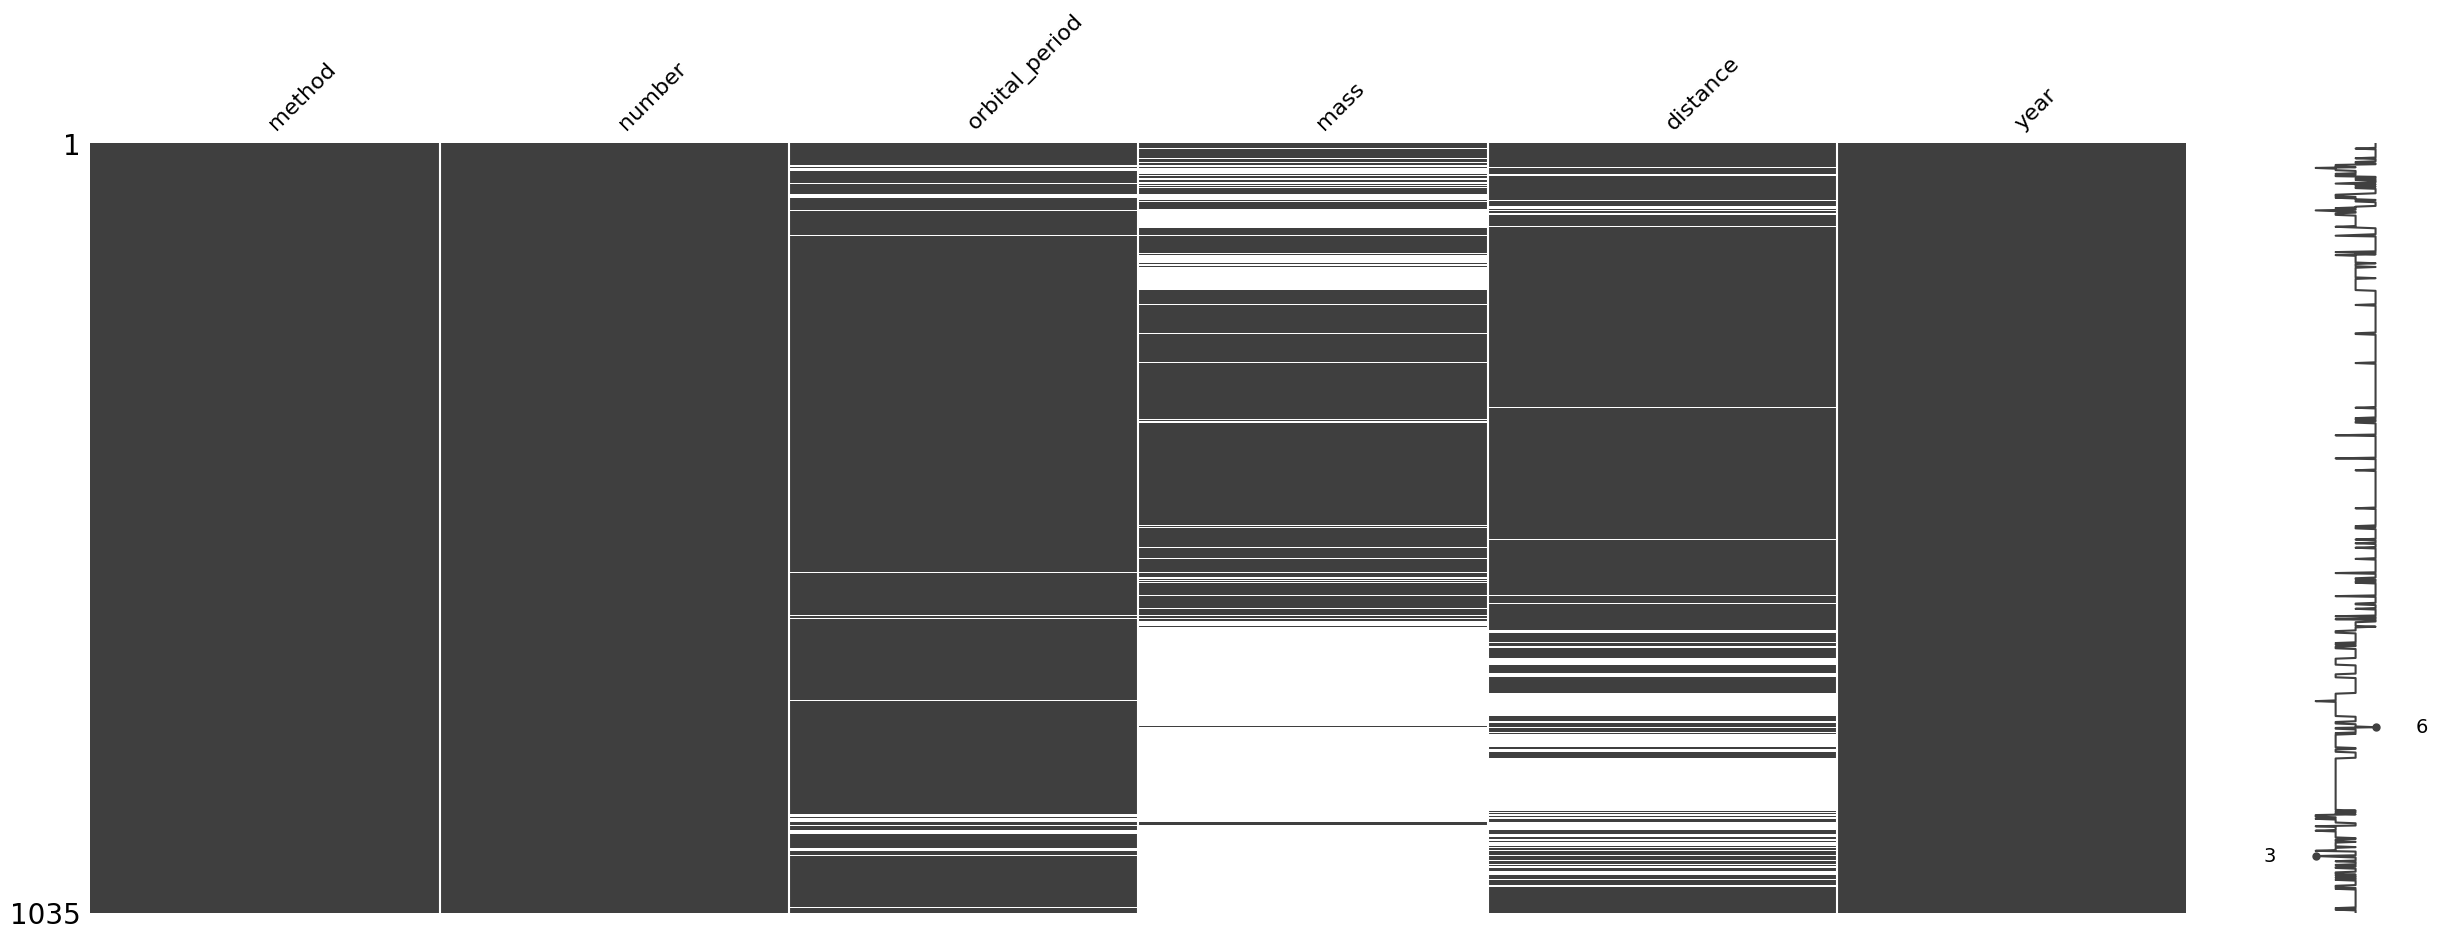

In [85]:
missingno.matrix(planets, figsize = (30,10));

In [86]:
# Take the most sparse column
print(planets.isnull().head(5) )# opposite is notnull()
print(planets.notnull().head(5) )#

   method  number  orbital_period   mass  distance   year
0   False   False           False  False     False  False
1   False   False           False  False     False  False
2   False   False           False  False     False  False
3   False   False           False  False     False  False
4   False   False           False  False     False  False
   method  number  orbital_period  mass  distance  year
0    True    True            True  True      True  True
1    True    True            True  True      True  True
2    True    True            True  True      True  True
3    True    True            True  True      True  True
4    True    True            True  True      True  True


,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.30000,7.100,77.40,2006
1,Radial Velocity,1,874.77400,2.210,56.95,2008
2,Radial Velocity,1,763.00000,2.600,19.84,2011
3,Radial Velocity,1,326.03000,19.400,110.62,2007
4,Radial Velocity,1,516.22000,10.500,119.47,2009
...,...,...,...,...,...,...
640,Radial Velocity,1,111.70000,2.100,14.90,2009
641,Radial Velocity,1,5.05050,1.068,44.46,2013
642,Radial Velocity,1,311.28800,1.940,17.24,1999
649,Transit,1,2.70339,1.470,178.00,2013


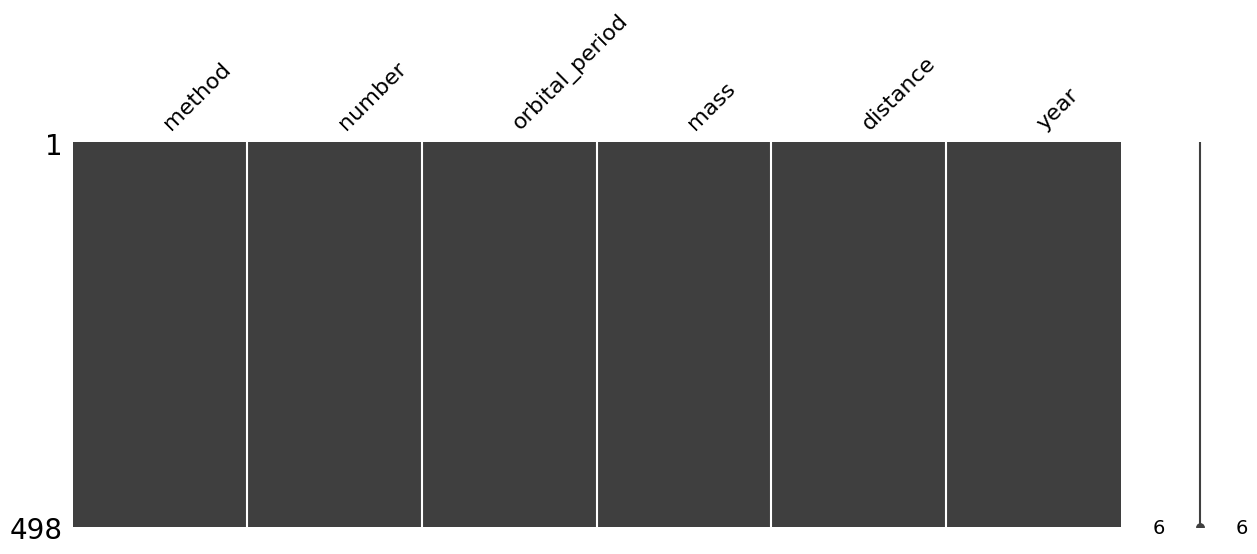

In [91]:
missingno.matrix(planets.dropna(), figsize = (15,5));
planets.dropna()

In [101]:
# drop columns
planets.dropna(axis = 'columns')

,method,number,year
0,Radial Velocity,1,2006
1,Radial Velocity,1,2008
2,Radial Velocity,1,2011
3,Radial Velocity,1,2007
4,Radial Velocity,1,2009
...,...,...,...
1030,Transit,1,2006
1031,Transit,1,2007
1032,Transit,1,2007
1033,Transit,1,2008


In [107]:
# Drop rows with missing values in column 'mass'
planets.dropna(subset=['mass', 'distance'])

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.30000,7.100,77.40,2006
1,Radial Velocity,1,874.77400,2.210,56.95,2008
2,Radial Velocity,1,763.00000,2.600,19.84,2011
3,Radial Velocity,1,326.03000,19.400,110.62,2007
4,Radial Velocity,1,516.22000,10.500,119.47,2009
...,...,...,...,...,...,...
640,Radial Velocity,1,111.70000,2.100,14.90,2009
641,Radial Velocity,1,5.05050,1.068,44.46,2013
642,Radial Velocity,1,311.28800,1.940,17.24,1999
649,Transit,1,2.70339,1.470,178.00,2013


<Axes: >

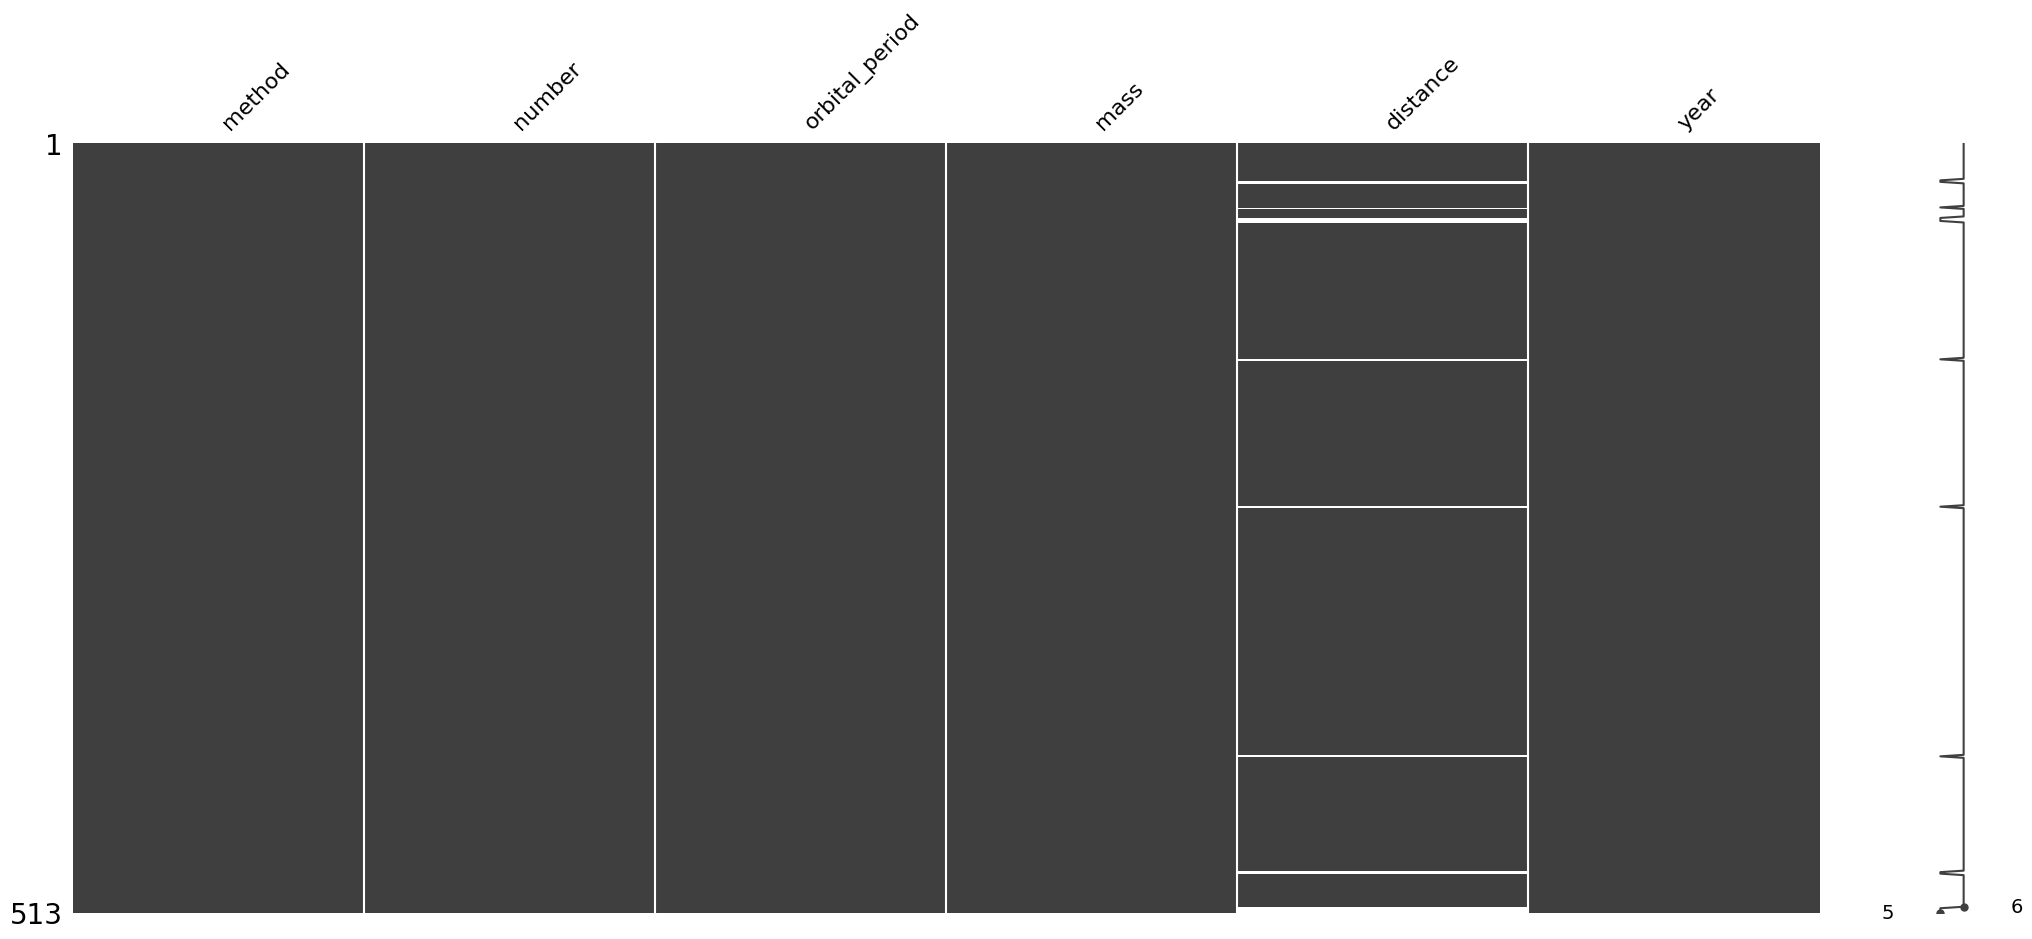

In [109]:
missingno.matrix(planets.dropna(subset=['mass']))

In [100]:
# drop nan
print('Full table', len(planets['mass']))
print('After dropping NaN', len(planets['mass'].dropna()))

# Just one column - series
planets['mass'].dropna()

Full table 1035
After dropping NaN 513


0       7.100
1       2.210
2       2.600
3      19.400
4      10.500
        ...  
784     0.947
913    19.800
914     0.340
915     0.400
916     1.540
Name: mass, Length: 513, dtype: float64

In [111]:
# drop columns with nan
# missingno.matrix(planets.dropna(axis='columns'), figsize = (15,5));

In [113]:
# fill nan with 0
planets.fillna(0).tail()    

,method,number,orbital_period,mass,distance,year
1030,Transit,1,3.941507,0.0,172.0,2006
1031,Transit,1,2.615864,0.0,148.0,2007
1032,Transit,1,3.191524,0.0,174.0,2007
1033,Transit,1,4.125083,0.0,293.0,2008
1034,Transit,1,4.187757,0.0,260.0,2008


<Axes: >

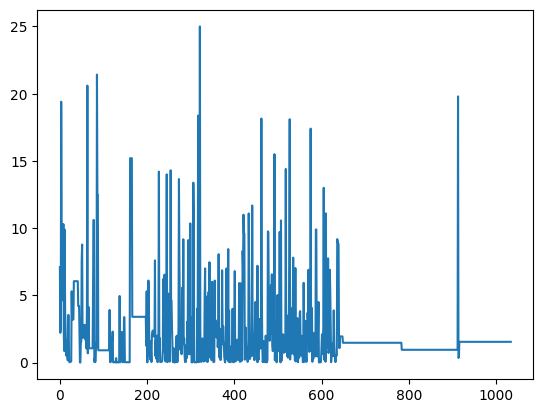

In [120]:
# forward-fill
# planets.fillna(method='ffill')['mass'].plot()
planets.ffill()['mass'].plot()


/tmp/ipykernel_56329/1572599639.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  planets.fillna(method='bfill', axis=1)['mass'].plot()


<Axes: >

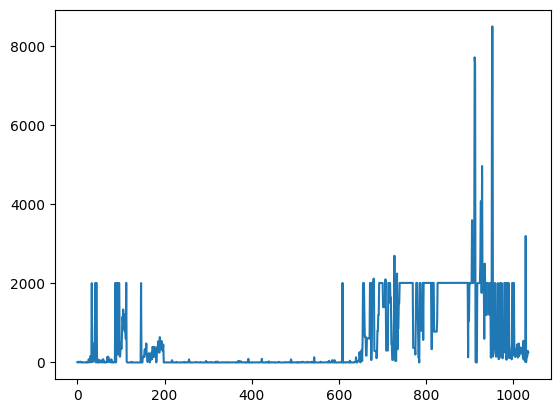

In [121]:
# back-fill
planets.fillna(method='bfill', axis=1)['mass'].plot()

In [ ]:
interpolate() 

### Exercise
Replace NaN with mean value via the column


In [130]:
planets = sns.load_dataset('planets')

planets

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300000,7.10,77.40,2006
1,Radial Velocity,1,874.774000,2.21,56.95,2008
2,Radial Velocity,1,763.000000,2.60,19.84,2011
3,Radial Velocity,1,326.030000,19.40,110.62,2007
4,Radial Velocity,1,516.220000,10.50,119.47,2009
...,...,...,...,...,...,...
1030,Transit,1,3.941507,NaN,172.00,2006
1031,Transit,1,2.615864,NaN,148.00,2007
1032,Transit,1,3.191524,NaN,174.00,2007
1033,Transit,1,4.125083,NaN,293.00,2008


In [143]:
planets_numeric = planets[['orbital_period', 'mass', 'distance']]
print(planets_numeric)
print(planets_numeric.mean())
print(type(planets_numeric.mean()))

new_planets = planets.replace(to_replace=np.nan, value=planets_numeric.mean())

      orbital_period   mass  distance
0         269.300000   7.10     77.40
1         874.774000   2.21     56.95
2         763.000000   2.60     19.84
3         326.030000  19.40    110.62
4         516.220000  10.50    119.47
...              ...    ...       ...
1030        3.941507    NaN    172.00
1031        2.615864    NaN    148.00
1032        3.191524    NaN    174.00
1033        4.125083    NaN    293.00
1034        4.187757    NaN    260.00

[1035 rows x 3 columns]
orbital_period    2002.917596
mass                 2.638161
distance           264.069282
dtype: float64
<class 'pandas.core.series.Series'>


<Axes: >

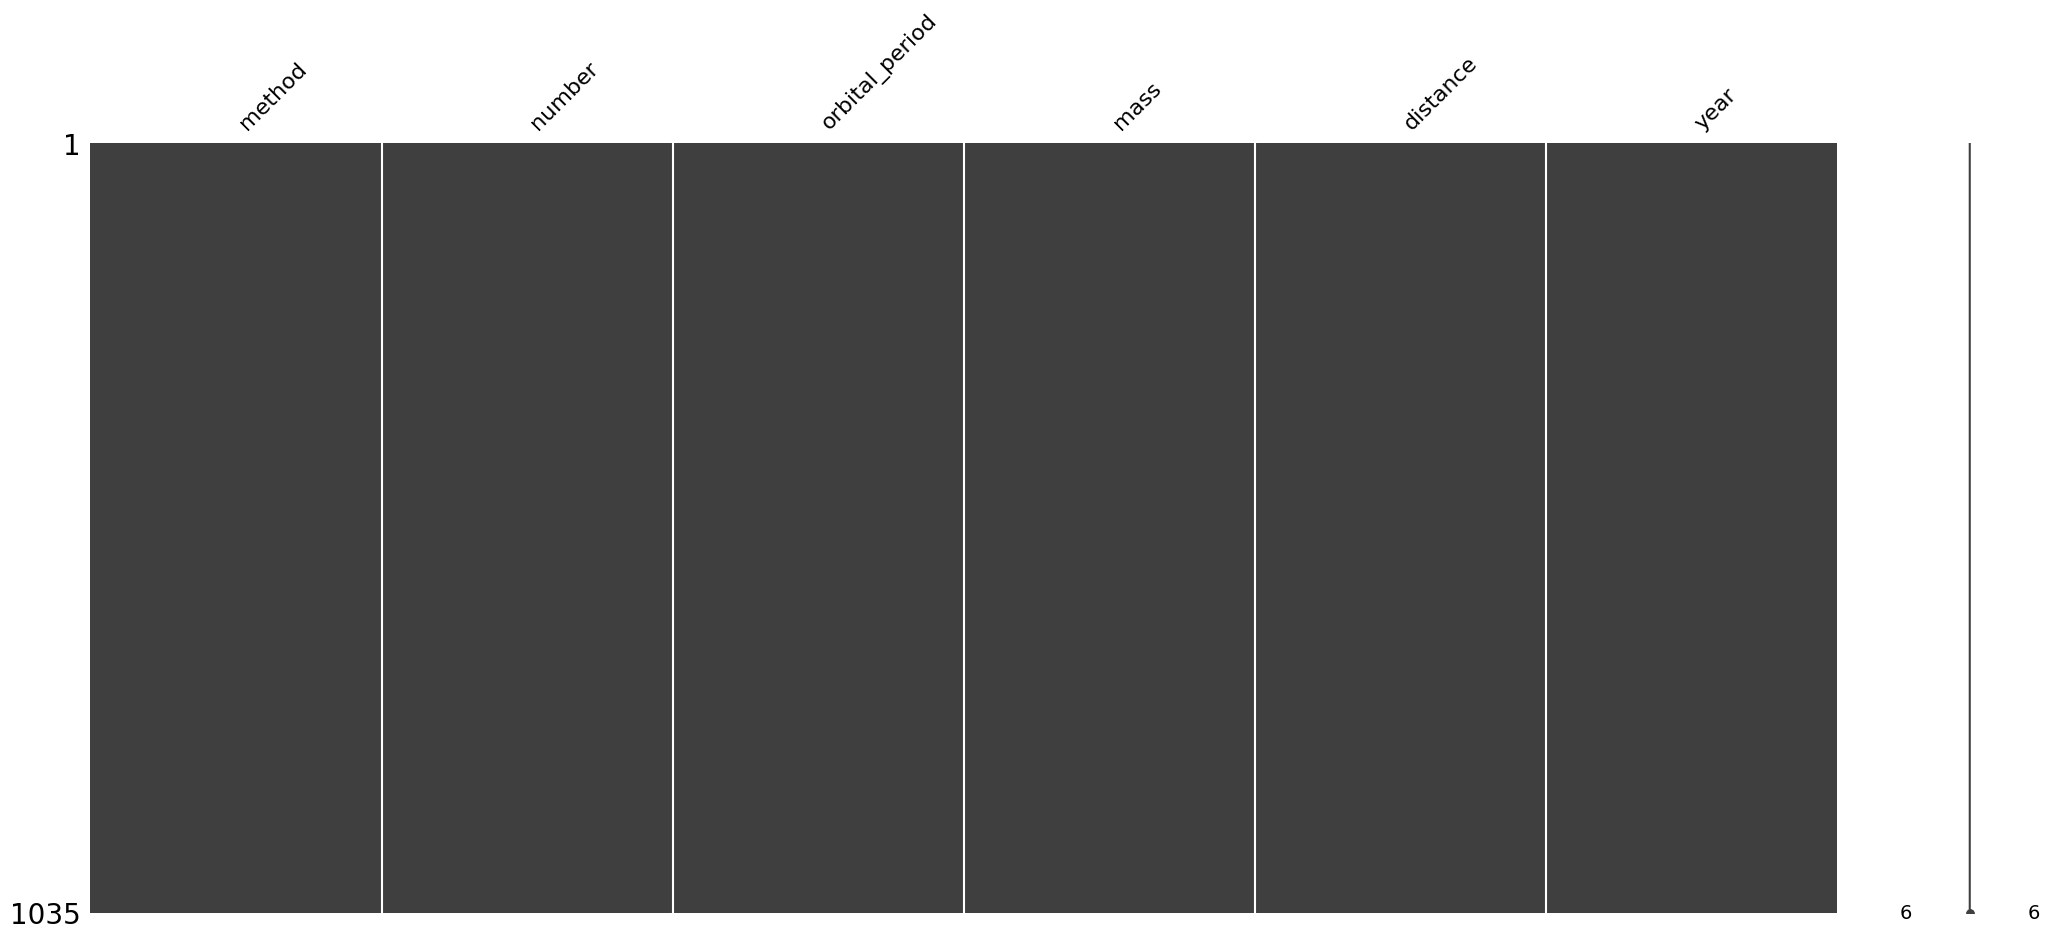

In [144]:
missingno.matrix(new_planets)

In [145]:
# Why aren't the same??? 
df1=planets.replace(to_replace=np.nan, value = 0)
df2= planets.fillna(0)

df1 is df2

False

## Sorting and filtering tables

https://cmdlinetips.com/2018/02/how-to-sort-pandas-dataframe-by-columns-and-row/

https://www.codecademy.com/learn/getting-started-with-python-for-data-science/modules/sorting-and-filtering-rows/cheatsheet

sort_values(): to sort pandas data frame by one or more columns

sort_index(): to sort pandas data frame by row index


In [53]:
# sort by a column
planets.sort_values('distance')

,method,number,orbital_period,mass,distance,year
46,Radial Velocity,1,3.235700,0.0036,1.35,2012
48,Radial Velocity,1,2502.000000,1.5500,3.22,2000
136,Radial Velocity,1,4.693800,0.0350,4.54,2007
145,Radial Velocity,4,124.260000,0.0460,4.70,2010
143,Radial Velocity,4,30.088100,0.7142,4.70,2000
...,...,...,...,...,...,...
989,Transit,1,3.161575,NaN,NaN,2011
997,Transit,1,2.423804,NaN,NaN,2011
998,Transit,1,3.126088,NaN,NaN,2011
999,Transit,1,1.430370,NaN,NaN,2011


In [54]:
# set new column as index
df1 = planets.set_index('year')
df1.sort_index()

,method,number,orbital_period,mass,distance
year,,,,,
1989,Radial Velocity,1,83.888000,11.680,40.57
1992,Pulsar Timing,3,66.541900,NaN,NaN
1992,Pulsar Timing,3,25.262000,NaN,NaN
1994,Pulsar Timing,3,98.211400,NaN,NaN
1995,Radial Velocity,1,4.230785,0.472,15.36
...,...,...,...,...,...
2014,Transit,2,15.965400,NaN,NaN
2014,Transit,2,179.612000,NaN,NaN
2014,Transit,4,6.164860,NaN,NaN


In [55]:
# filtering by index
planets.loc[planets.mass>5] # same as planets[planets.mass>5]

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009
8,Radial Velocity,1,993.300,10.30,73.10,2008
11,Radial Velocity,1,335.100,9.88,39.43,2009
...,...,...,...,...,...,...
620,Radial Velocity,1,745.700,5.30,307.69,2011
636,Radial Velocity,1,124.600,9.18,149.25,2013
637,Radial Velocity,1,17337.500,9.00,23.98,2009
638,Radial Velocity,1,511.098,8.82,31.33,2002


In [56]:
# filtering 
planets[planets['method']=='Radial Velocity']

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.3000,7.10,77.40,2006
1,Radial Velocity,1,874.7740,2.21,56.95,2008
2,Radial Velocity,1,763.0000,2.60,19.84,2011
3,Radial Velocity,1,326.0300,19.40,110.62,2007
4,Radial Velocity,1,516.2200,10.50,119.47,2009
...,...,...,...,...,...,...
914,Radial Velocity,1,6.9580,0.34,NaN,2014
915,Radial Velocity,1,5.1180,0.40,NaN,2014
916,Radial Velocity,1,121.7100,1.54,NaN,2014
939,Radial Velocity,1,4.4264,NaN,NaN,2012


In [57]:
#nsmallest() and nlargest()
planets.nsmallest(3, 'mass', keep='last')

,method,number,orbital_period,mass,distance,year
46,Radial Velocity,1,3.23570,0.00360,1.35,2012
128,Radial Velocity,4,3.14942,0.00600,6.27,2005
263,Radial Velocity,3,40.11400,0.00755,6.06,2011


In [ ]:
# Parameters

# ascending=False
# na_position='first'
# inplace=True

## GroupBy: Split, Apply, Combine
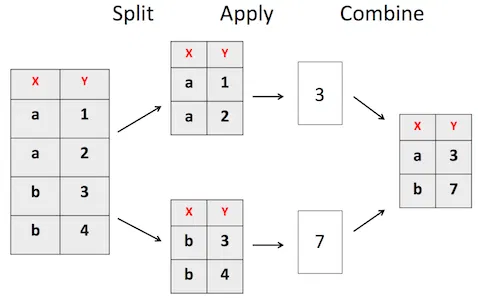

https://realpython.com/pandas-groupby/

**Aggregation functions**
- count() Total number of items
- first(), last() First and last item
- mean(), median() Mean and median
- min(), max() Minimum and maximum
- std(), var() Standard deviation and variance
- mad() Mean absolute deviation
- prod() Product of all items
- sum() Sum of all items

In [106]:
planets['mass'].mean()

2.6381605847953216

In [281]:
planets

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300000,7.10,77.40,2006
1,Radial Velocity,1,874.774000,2.21,56.95,2008
2,Radial Velocity,1,763.000000,2.60,19.84,2011
3,Radial Velocity,1,326.030000,19.40,110.62,2007
4,Radial Velocity,1,516.220000,10.50,119.47,2009
...,...,...,...,...,...,...
1030,Transit,1,3.941507,NaN,172.00,2006
1031,Transit,1,2.615864,NaN,148.00,2007
1032,Transit,1,3.191524,NaN,174.00,2007
1033,Transit,1,4.125083,NaN,293.00,2008


In [63]:
planets['method'].nunique()

10

In [282]:
# General information
planets.describe()

# BTW, what is 25% and 75% mean? 

,number,orbital_period,mass,distance,year
count,1035.000000,992.000000,513.000000,808.000000,1035.000000
mean,1.785507,2002.917596,2.638161,264.069282,2009.070531
std,1.240976,26014.728304,3.818617,733.116493,3.972567
min,1.000000,0.090706,0.003600,1.350000,1989.000000
25%,1.000000,5.442540,0.229000,32.560000,2007.000000
50%,1.000000,39.979500,1.260000,55.250000,2010.000000
75%,2.000000,526.005000,3.040000,178.500000,2012.000000
max,7.000000,730000.000000,25.000000,8500.000000,2014.000000


In [64]:
planets.mean()

TypeError: Could not convert ['Radial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityImagingImagingImagingEclipse Timing VariationsImagingImagingImagingImagingEclipse Timing VariationsEclipse Timing VariationsEclipse Timing VariationsEclipse Timing VariationsEclipse Timing VariationsEclipse Timing VariationsEclipse Timing VariationsEclipse Timing VariationsRadial VelocityRadial VelocityImagingRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityImagingRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityImagingImagingImagingImagingImagingImagingImagingImagingRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityImagingImagingTransitTransitTransitTransitTransitTransitTransitRadial VelocityTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitAstrometryRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityImagingRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityTransitRadial VelocityRadial VelocityRadial VelocityImagingTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitRadial VelocityTransitTransitTransitTransitRadial VelocityTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitRadial VelocityTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityImagingRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityImagingRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityAstrometryRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityImagingRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityImagingRadial VelocityRadial VelocityRadial VelocityImagingRadial VelocityRadial VelocityRadial VelocityImagingImagingImagingImagingTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransit Timing VariationsTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitRadial VelocityTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransit Timing VariationsTransitTransitTransitTransitTransitRadial VelocityTransitTransitTransitTransitTransitTransitTransit Timing VariationsTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitRadial VelocityTransitTransitOrbital Brightness ModulationOrbital Brightness ModulationTransitTransitTransitOrbital Brightness ModulationTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransit Timing VariationsTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitRadial VelocityTransitRadial VelocityTransitTransitTransitRadial VelocityTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitRadial VelocityTransitTransitTransitTransitTransitTransitImagingTransitMicrolensingMicrolensingMicrolensingMicrolensingMicrolensingMicrolensingMicrolensingMicrolensingMicrolensingMicrolensingMicrolensingRadial VelocityRadial VelocityRadial VelocityRadial VelocityMicrolensingMicrolensingMicrolensingMicrolensingMicrolensingMicrolensingMicrolensingMicrolensingMicrolensingMicrolensingMicrolensingMicrolensingTransitTransitTransitTransitTransitTransitTransitTransitImagingTransitRadial VelocityRadial VelocityPulsar TimingPulsar TimingPulsar TimingPulsar TimingPulsar TimingTransitTransitImagingImagingImagingTransitTransitTransitTransitTransitTransitImagingPulsation Timing VariationsTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitImagingTransitImagingTransitTransitTransitTransitTransit'] to numeric

In [284]:
planets['method'].unique()

array(['Radial Velocity', 'Imaging', 'Eclipse Timing Variations',
       'Transit', 'Astrometry', 'Transit Timing Variations',
       'Orbital Brightness Modulation', 'Microlensing', 'Pulsar Timing',
       'Pulsation Timing Variations'], dtype=object)

In [65]:
# GroupBy: Split, Apply, Combine
planets.groupby('method')

In [67]:
planets.groupby('method').sum()

,number,orbital_period,mass,distance,year
method,,,,,
Astrometry,2,1.262360e+03,0.00000,35.75,4023
Eclipse Timing Variations,15,4.276480e+04,10.25000,1261.44,18090
Imaging,50,1.418973e+06,0.00000,2166.91,76347
Microlensing,27,2.207500e+04,0.00000,41440.00,46225
Orbital Brightness Modulation,5,2.127920e+00,0.00000,2360.00,6035
Pulsar Timing,11,3.671511e+04,0.00000,1200.00,9992
Pulsation Timing Variations,1,1.170000e+03,0.00000,0.00,2007
Radial Velocity,952,4.553151e+05,1341.65638,27348.11,1110158
Transit,776,8.377523e+03,1.47000,134242.77,798461


In [68]:
# column indexing -- results in Series
planets.groupby('method')['orbital_period'].std()

method
Astrometry                          544.217663
Eclipse Timing Variations          2499.130945
Imaging                          213978.177277
Microlensing                       1113.166333
Orbital Brightness Modulation         0.725493
Pulsar Timing                     16313.265573
Pulsation Timing Variations                NaN
Radial Velocity                    1454.926210
Transit                              46.185893
Transit Timing Variations            71.599884
Name: orbital_period, dtype: float64

In [71]:
# describe data of the one column
planets.groupby('method')['year'].describe()

,count,mean,std,min,25%,50%,75%,max
method,,,,,,,,
Astrometry,2.0,2011.500000,2.121320,2010.0,2010.75,2011.5,2012.25,2013.0
Eclipse Timing Variations,9.0,2010.000000,1.414214,2008.0,2009.00,2010.0,2011.00,2012.0
Imaging,38.0,2009.131579,2.781901,2004.0,2008.00,2009.0,2011.00,2013.0
Microlensing,23.0,2009.782609,2.859697,2004.0,2008.00,2010.0,2012.00,2013.0
Orbital Brightness Modulation,3.0,2011.666667,1.154701,2011.0,2011.00,2011.0,2012.00,2013.0
Pulsar Timing,5.0,1998.400000,8.384510,1992.0,1992.00,1994.0,2003.00,2011.0
Pulsation Timing Variations,1.0,2007.000000,NaN,2007.0,2007.00,2007.0,2007.00,2007.0
Radial Velocity,553.0,2007.518987,4.249052,1989.0,2005.00,2009.0,2011.00,2014.0
Transit,397.0,2011.236776,2.077867,2002.0,2010.00,2012.0,2013.00,2014.0


In [74]:
# agregate method
planets.groupby('year').aggregate(['min', max])

/tmp/ipykernel_109061/2427490671.py:2: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  planets.groupby('year').aggregate(['min', max])


method                            number      \
                            min                        max    min max   
year                                                                    
1989            Radial Velocity            Radial Velocity      1   1   
1992              Pulsar Timing              Pulsar Timing      3   3   
1994              Pulsar Timing              Pulsar Timing      3   3   
1995            Radial Velocity            Radial Velocity      1   1   
1996            Radial Velocity            Radial Velocity      1   5   
1997            Radial Velocity            Radial Velocity      1   1   
1998            Radial Velocity            Radial Velocity      1   4   
1999            Radial Velocity            Radial Velocity      1   4   
2000            Radial Velocity            Radial Velocity      1   4   
2001            Radial Velocity            Radial Velocity      1   3   
2002            Radial Velocity                    Transit      1   5   
2003              Pulsar Timing            Radial Velocity      1   3   
2004                    Imaging                    Transit      1   5   
2005                    Imaging            Radial Velocity      1   4   
2006                    Imaging                    Transit      1   4   
2007                    Imaging                    Transit      1   5   
2008  Eclipse Timing Variations                    Transit      1   6   
2009  Eclipse Timing Variations                    Transit      1   3   
2010                 Astrometry                    Transit      1   6   
2011  Eclipse Timing Variations  Transit Timing Variations      1   6   
2012  Eclipse Timing Variations  Transit Timing Variations      1   6   
2013                 Astrometry  Transit Timing Variations      1   7   
2014            Radial Velocity  Transit Timing Variations      1   5   

     orbital_period                     mass         distance           
                min            max       min     max      min      max  
year                                                                    
1989      83.888000      83.888000  11.68000  11.680    40.57    40.57  
1992      25.262000      66.541900       NaN     NaN      NaN      NaN  
1994      98.211400      98.211400       NaN     NaN      NaN      NaN  
1995       4.230785       4.230785   0.47200   0.472    15.36    15.36  
1996       3.313500    1078.000000   0.68760   3.900    12.53    21.41  
1997      39.845000      39.845000   1.04000   1.040    17.43    17.43  
1998       3.097000     442.100000   0.52000   8.020     4.70    47.92  
1999       3.510000    3810.000000   0.42000   8.440    10.91    59.03  
2000       3.024000    2502.000000   0.24900  18.100     3.22    80.00  
2001       6.276000    2391.000000   0.54000  10.350    14.08    77.82  
2002       1.211919    4909.000000   0.11500  17.400    12.53   121.36  
2003       1.328300   36525.000000   0.22900  18.370    11.11   133.16  
2004       1.432475    4205.800000   0.08700   3.690    10.23  2500.00  
2005       1.937780    4270.000000   0.00600  14.000     4.70   300.30  
2006       1.796000  730000.000000   0.03300   7.600     8.77  8500.00  
2007       1.306186    1333.000000   0.03500  19.800     4.54  2000.00  
2008       1.091423  318280.000000   0.01260  25.000     4.94   680.00  
2009       0.788840   17337.500000   0.01600  21.420     8.52   550.00  
2010       1.212884   18000.000000   0.01300  13.000     4.70  2700.00  
2011       0.090706   40000.000000   0.00755  13.650     6.06  2250.00  
2012       0.742960    6005.000000   0.00360  11.100     1.35  7720.00  
2013       0.355000    4100.000000   0.00800  20.600     6.80  7560.00  
2014       0.669310    3827.000000   0.34000   2.580    20.48  1056.00

In [80]:
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


**Filter, transform, apply**

Filter selects groups but not records. It compares agregated groups with some value. 

In [86]:
def filter_func(x):
    return x['mass'].mean()>2

print(planets.groupby('year').filter(filter_func))

#and now with lambda
planets.groupby('year').filter(lambda x: x['mass'].mean()>2)

               method  number  orbital_period   mass  distance  year
1     Radial Velocity       1      874.774000   2.21     56.95  2008
3     Radial Velocity       1      326.030000  19.40    110.62  2007
4     Radial Velocity       1      516.220000  10.50    119.47  2009
5     Radial Velocity       1      185.840000   4.80     76.39  2008
6     Radial Velocity       1     1773.400000   4.64     18.15  2002
...               ...     ...             ...    ...       ...   ...
1029          Imaging       1             NaN    NaN     10.10  2012
1031          Transit       1        2.615864    NaN    148.00  2007
1032          Transit       1        3.191524    NaN    174.00  2007
1033          Transit       1        4.125083    NaN    293.00  2008
1034          Transit       1        4.187757    NaN    260.00  2008

[628 rows x 6 columns]


,method,number,orbital_period,mass,distance,year
1,Radial Velocity,1,874.774000,2.21,56.95,2008
3,Radial Velocity,1,326.030000,19.40,110.62,2007
4,Radial Velocity,1,516.220000,10.50,119.47,2009
5,Radial Velocity,1,185.840000,4.80,76.39,2008
6,Radial Velocity,1,1773.400000,4.64,18.15,2002
...,...,...,...,...,...,...
1029,Imaging,1,NaN,NaN,10.10,2012
1031,Transit,1,2.615864,NaN,148.00,2007
1032,Transit,1,3.191524,NaN,174.00,2007
1033,Transit,1,4.125083,NaN,293.00,2008


In [100]:
(planets[planets['method']=='Transit Timing Variations'])

,method,number,orbital_period,mass,distance,year
680,Transit Timing Variations,2,160.0000,NaN,2119.0,2011
736,Transit Timing Variations,2,57.0110,NaN,855.0,2012
749,Transit Timing Variations,3,NaN,NaN,NaN,2014
813,Transit Timing Variations,2,22.3395,NaN,339.0,2013


In [101]:
(planets[planets['method']=='Pulsar Timing'])

,method,number,orbital_period,mass,distance,year
941,Pulsar Timing,3,25.262000,NaN,NaN,1992
942,Pulsar Timing,3,66.541900,NaN,NaN,1992
943,Pulsar Timing,3,98.211400,NaN,NaN,1994
944,Pulsar Timing,1,36525.000000,NaN,NaN,2003
945,Pulsar Timing,1,0.090706,NaN,1200.0,2011


In [97]:
planets.groupby('method').filter(lambda x: x['number'].mean()>2)  #['distance'].filter()  #.filter(lambda x: x['mass'].mean()>2))

,method,number,orbital_period,mass,distance,year
680,Transit Timing Variations,2,160.000000,NaN,2119.0,2011
736,Transit Timing Variations,2,57.011000,NaN,855.0,2012
749,Transit Timing Variations,3,NaN,NaN,NaN,2014
813,Transit Timing Variations,2,22.339500,NaN,339.0,2013
941,Pulsar Timing,3,25.262000,NaN,NaN,1992
942,Pulsar Timing,3,66.541900,NaN,NaN,1992
943,Pulsar Timing,3,98.211400,NaN,NaN,1994
944,Pulsar Timing,1,36525.000000,NaN,NaN,2003
945,Pulsar Timing,1,0.090706,NaN,1200.0,2011


https://www.skytowner.com/explore/difference_between_methods_apply_and_transform_for_groupby_in_pandas

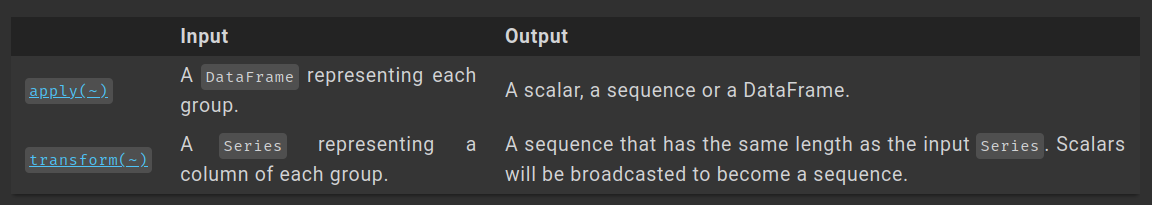

   - apply(func, axis=0): call a function func along an axis of the DataFrame. It returns the result of applying func along the given axis.
   - transform(func, axis=0): call a function func on self producing a DataFrame with transformed values. It returns a DataFrame that has the same length as self.

Transform vs. apply: similar but different

    (1) transform() works with function, a string function, a list of functions, and a dict. However, apply() is only allowed with function.
    (2) transform() cannot produce aggregated results.
    (3) apply() works with multiple Series at a time. But, transform() is only allowed to work with a single Series at a time.

In [289]:
# transform - remains the index and doesn't reduce the table 
planets.groupby('method').transform(lambda x: x - x.sum())

,number,orbital_period,mass,distance,year
0,-951,-455045.838049,-1334.55638,-27270.71,-1108152
1,-951,-454440.364049,-1339.44638,-27291.16,-1108150
2,-951,-454552.138049,-1339.05638,-27328.27,-1108147
3,-951,-454989.108049,-1322.25638,-27237.49,-1108151
4,-951,-454798.918049,-1331.15638,-27228.64,-1108149
...,...,...,...,...,...
1030,-775,-8373.581344,NaN,-134070.77,-796455
1031,-775,-8374.906986,NaN,-134094.77,-796454
1032,-775,-8374.331327,NaN,-134068.77,-796454
1033,-775,-8373.397768,NaN,-133949.77,-796453


In [ ]:
planets.groupby('method').transform(lambda x: x - x.sum())

In [290]:
planets.groupby('method').apply(lambda x: x - x.sum())

number  orbital_period  mass   distance  \
method                                                                    
Astrometry                113     -1.0    -1016.000000   NaN     -14.98   
                          537     -1.0     -246.360000   NaN     -20.77   
Eclipse Timing Variations 32     -14.0   -32544.800000  -4.2        NaN   
                          37     -13.0   -36997.800000   NaN   -1130.72   
                          38     -13.0   -39443.800000   NaN   -1130.72   
...                                ...             ...   ...        ...   
Transit                   1034  -775.0    -8373.335093   NaN -133982.77   
Transit Timing Variations 680     -7.0      -79.350500   NaN   -1194.00   
                          736     -7.0     -182.339500   NaN   -2458.00   
                          749     -6.0             NaN   NaN        NaN   
                          813     -7.0     -217.011000   NaN   -2974.00   

                                    year  
method                                    
Astrometry                113    -2010.0  
                          537    -2013.0  
Eclipse Timing Variations 32    -16081.0  
                          37    -16082.0  
                          38    -16082.0  
...                                  ...  
Transit                   1034 -796453.0  
Transit Timing Variations 680    -6039.0  
                          736    -6038.0  
                          749    -6036.0  
                          813    -6037.0  

[1035 rows x 5 columns]

In [291]:
# apply() method for an arbitary function:  as a map() function in Python
def func(num):
    if number<10:
        return "Low"
  
    elif number>= 10 :
        return "Normal"


# print(planets.groupby('mass').mean())
planets.groupby('method').apply(lambda x: x['distance'].mean())

method
Astrometry                         17.875000
Eclipse Timing Variations         315.360000
Imaging                            67.715937
Microlensing                     4144.000000
Orbital Brightness Modulation    1180.000000
Pulsar Timing                    1200.000000
Pulsation Timing Variations              NaN
Radial Velocity                    51.600208
Transit                           599.298080
Transit Timing Variations        1104.333333
dtype: float64

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300000,7.10,77.40,2006
1,Radial Velocity,1,874.774000,2.21,56.95,2008
2,Radial Velocity,1,763.000000,2.60,19.84,2011
3,Radial Velocity,1,326.030000,19.40,110.62,2007
4,Radial Velocity,1,516.220000,10.50,119.47,2009
...,...,...,...,...,...,...
1030,Transit,1,3.941507,NaN,172.00,2006
1031,Transit,1,2.615864,NaN,148.00,2007
1032,Transit,1,3.191524,NaN,174.00,2007
1033,Transit,1,4.125083,NaN,293.00,2008


### Exersice
1) See all years where the planets was discovered 

2) Take the most fruitful year 

3) Which year is it?

In [107]:
# find all records that has distance greater than a mean distance within one method
# group by method -> filter against mean 

In [134]:
dist = planets.groupby('method').apply(lambda x: x['distance'] > x['distance'].mean())
planets[dist.values]

In [150]:
dist.values

array([ True, False, False, ..., False, False, False])

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300000,7.10,77.40,2006
5,Radial Velocity,1,185.840000,4.80,76.39,2008
6,Radial Velocity,1,1773.400000,4.64,18.15,2002
12,Radial Velocity,1,479.100000,3.88,97.28,2008
13,Radial Velocity,3,1078.000000,2.53,14.08,1996
...,...,...,...,...,...,...
948,Imaging,1,NaN,NaN,135.00,2013
951,Transit,1,4.200000,NaN,8500.00,2006
952,Transit,1,1.796000,NaN,8500.00,2006
1025,Transit,1,3.067850,NaN,60.00,2012


True

In [149]:
planets[randindex]

,method,number,orbital_period,mass,distance,year
1,Radial Velocity,1,874.774000,2.210,56.95,2008
3,Radial Velocity,1,326.030000,19.400,110.62,2007
10,Radial Velocity,2,883.000000,0.860,74.79,2010
15,Radial Velocity,3,14002.000000,1.640,14.08,2009
16,Radial Velocity,1,4.230785,0.472,15.36,1995
...,...,...,...,...,...,...
1027,Imaging,1,NaN,NaN,19.20,2011
1028,Transit,1,3.352057,NaN,3200.00,2012
1030,Transit,1,3.941507,NaN,172.00,2006
1032,Transit,1,3.191524,NaN,174.00,2007


## Visualization in Pandas

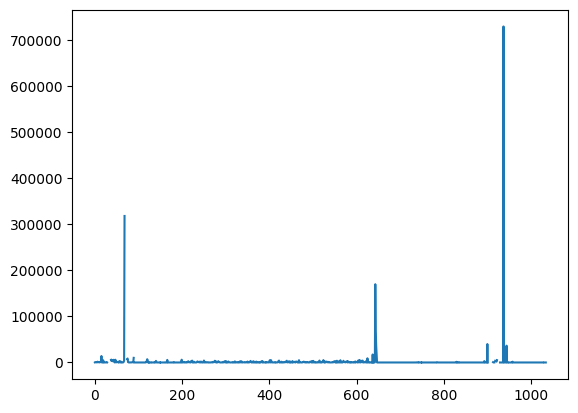

In [294]:
planets['orbital_period'].plot();

<Axes: xlabel='method'>

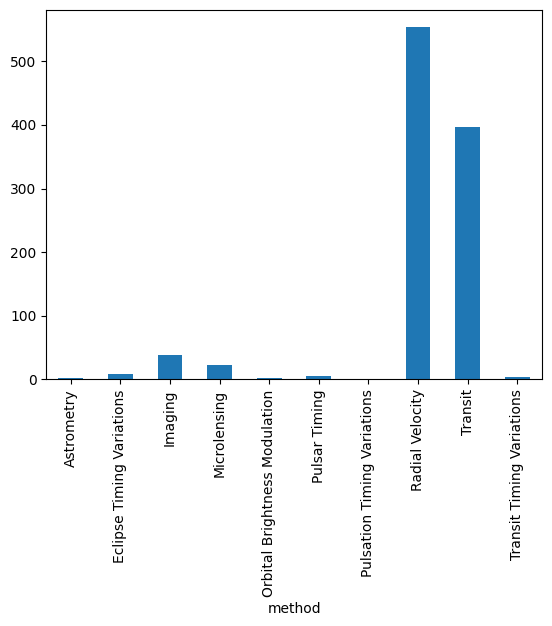

In [295]:
planets.groupby('method').count()['number'].plot.bar()

## Combining tables

https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html

https://realpython.com/pandas-merge-join-and-concat/


**There are 3 ways to combine tables**
- merge() for combining data on common columns or indices
- .join() for combining data on a key column or an index
- concat() for combining DataFrames across rows or columns


### Concatenate

In [296]:
df1 = pd.DataFrame({'A': ['A0', 'A1'],
                    'B': ['B0', 'B1'],},
                    index=[0, 1])

df2 = pd.DataFrame({'A': ['A2', 'A3'],
                    'B': ['B2', 'B3'],},
                    index=[2, 3])

frames = [df1, df2]
pd.concat(frames)

,A,B
0,A0,B0
1,A1,B1
2,A2,B2
3,A3,B3


In [297]:
df1 = pd.DataFrame({'A': ['A0', 'A1'],
                    'B': ['B0', 'B1'],},
                    index=[0, 1])

df2 = pd.DataFrame({'C': ['C0', 'C1'],
                    'D': ['D0', 'D1'],},
                    index=[0, 1])

frames = [df1, df2]
pd.concat(frames, axis='columns')

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1


## With join 

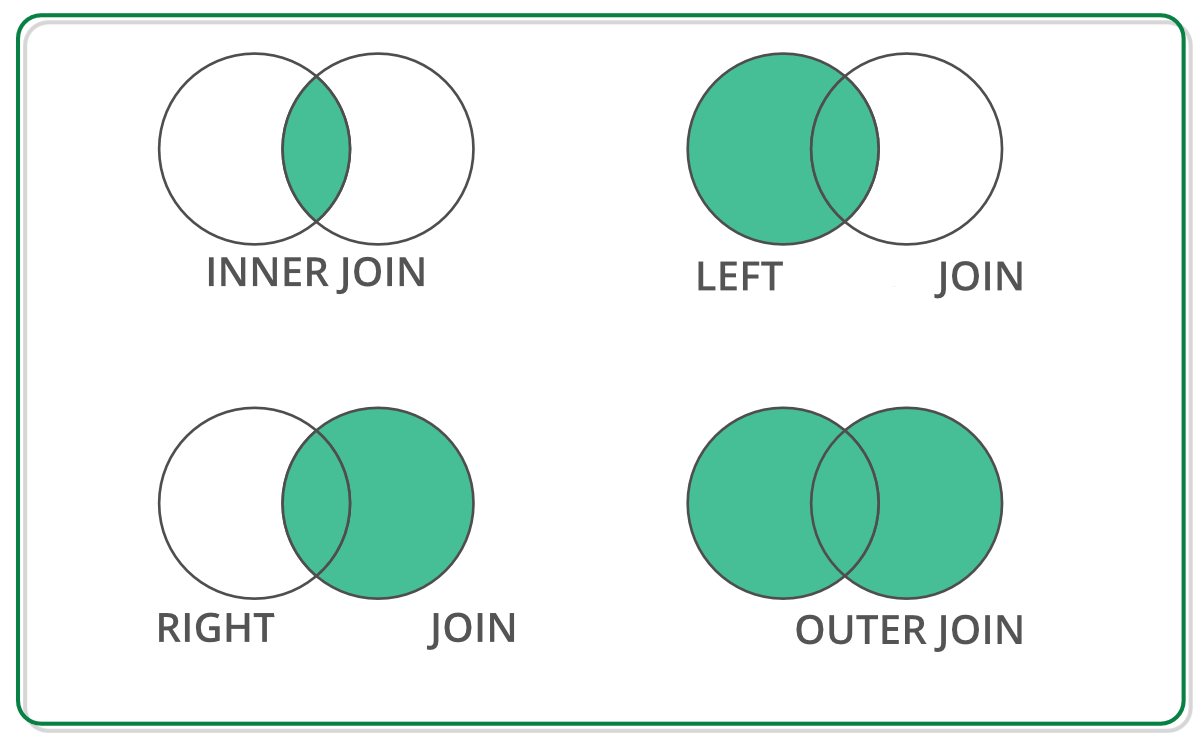

In [ ]:
# one-to-one joins: for example when joining two DataFrame objects on their indexes (which must contain unique values)
# many-to-one joins: for example when joining an index (unique) to one or more columns in a DataFrame
# many-to-many joins: joining columns on columns.


In [ ]:
arr1 = np.array([1, 2, 3, 2, 3, 4, 4, 5, 6])
# arr2 = np.array([[0, 0, 0], [0, 0, 4], [4, 5, 6]])
arr2 = arr1.copy()
arr3 = arr1.view()

print(arr1.flags['OWNDATA'])
print(arr2.flags)
print(arr3.flags)

In [ ]:
print(arr1.base)

In [ ]:
# Copy or view? 

df = pd.DataFrame([[1,2,3,4],[5,6,7,8]], index = ['row1','row2'], 
        columns = ['a','b','c','d'])
df2 = df.iloc[0:2, :]
df3 = df.loc[df['a'] == 1, :]

# df is neither copy nor view
print('df is neither copy nor view')
print(df._is_view, df._is_copy)

# df2 is a view AND a copy
print('\ndf2 is a view AND a copy')
print(df2._is_view, df2._is_copy)

# df3 is not a view, but a copy
print('\ndf3 is not a view, but a copy')
print(df3._is_view, df3._is_copy)


## Multiindex or hierarchical 